# Approximating Integrals

Some code and visualizations to see how quickly different integral approximations converge to the 'true' value.

In [1]:
from matplotlib import pyplot as plt
from time import time
from math import sqrt, e
import numpy as np
%matplotlib inline

In [2]:
# first, some basic setup

# we'll integrate from 0 to 10
left_x = 0
right_x = 10

# Here are the different methods for approximating the area.

def trapezoid(fn, x_i, delta_x):
    return (delta_x / 2) * (fn(x_i) + fn(x_i+delta_x))

def midpoint(fn, x_i, delta_x):
    return delta_x * fn((x_i + x_i + delta_x) / 2.0)

def left(fn, x_i, delta_x):
    return fn(x_i) * delta_x

def right(fn, x_i, delta_x):
    return fn(x_i+delta_x) * delta_x

# This is a helper method that 'wraps' the actual approximation methods,
# and allows us to re-use the basic logic of summing the different "sub-areas".
def calculate(method, fn, n):
    sum = 0
    delta_x = float((right_x - left_x)) / n
    for i in range(0, n):
        x_i = left_x + delta_x * i
        sum += method(fn, x_i, delta_x)
    return sum

In [12]:
def calculate_and_plot(steps, fn, actual):
    areas = {
        'midpoint': [],
        'left': [],
        'right': [],
        'trapezoid': []
    }

    for n in range(2, steps):
        areas['trapezoid'].append(calculate(trapezoid, fn, n))
        areas['midpoint'].append(calculate(midpoint, fn, n))
        areas['right'].append(calculate(right, fn, n))
        areas['left'].append(calculate(left, fn, n))
        
    plt.figure(figsize=(14, 4))
    plt.plot([fn(x_i) for x_i in np.arange(0,10)])
    plt.title("The actual function we're approximating the area under. (roughly)")
    plt.show()
        
    plt.figure(figsize=(14, 10))
    plt.plot(areas['trapezoid'], label="Trapezoid")
    plt.plot(areas['midpoint'], label="Midpoint")
    plt.plot(areas['right'], label="Right")
    plt.plot(areas['left'], label="Left")

    plt.plot([actual for i in range(steps-2)], label="Actual")

    plt.title("Convergence using different approximations")
    plt.legend()
    plt.show()

## Approximations of x^2

The true area under this function from 0 to 10 is `(1000 / 3)`.

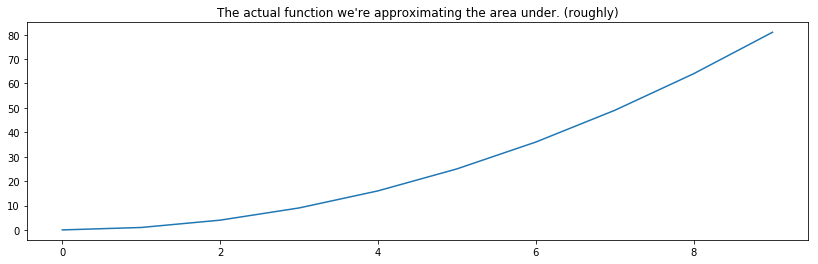

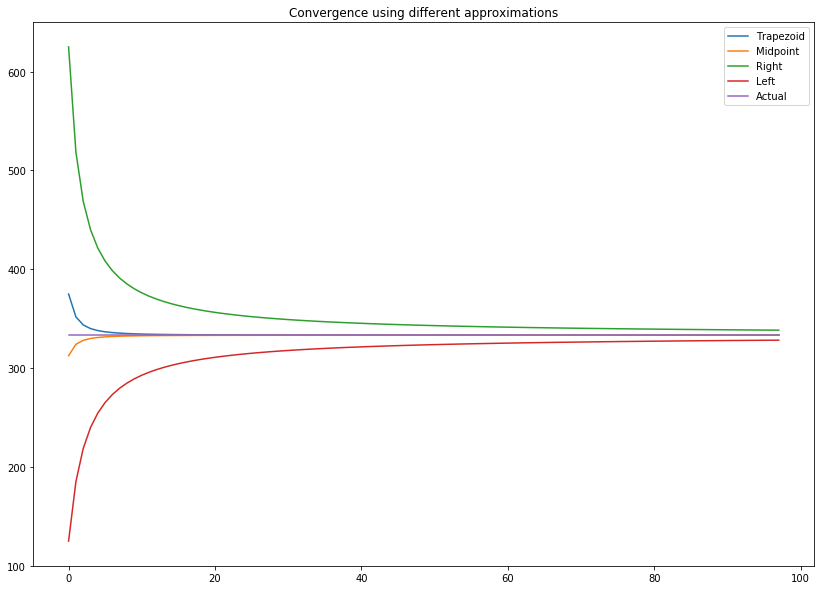

In [13]:
# f(x) = x^2 ("x squared")
def x_squared(x):
    return x ** 2 

calculate_and_plot(100, x_squared, 1000.0 / 3)

First, let me explain what this graph represents. The x-axis is the number of subdivisions, or 'n'. The y-axis is the estimated area under that curve, with a given number of subdivisions. Each line is the approximation using a different method.

From the above graph, we can immediately see that the left and right approximations are much less accurate than midpoint and trapezoid. In fact, even after 100 subdivisions, it still is a very innacurate approximation.

Midpoint is the best, and it converges in just a few steps. In this example, the trapezoid method takes about twice as many subdivisions to get a similar approximation.

This function is increasing and concave up. This graph confirms what we learned in class, that:

- Because the function increases:
    - The 'right' sum is an overestimate
    - The 'left' sum is an underestimate
- Because the function is concave up:
    - Midpoint is an underestimate
    - Trapezoid is an overestimate

That was cool, let's do a function that is decreasing and concave down. Maybe.. the negative of the previous function.

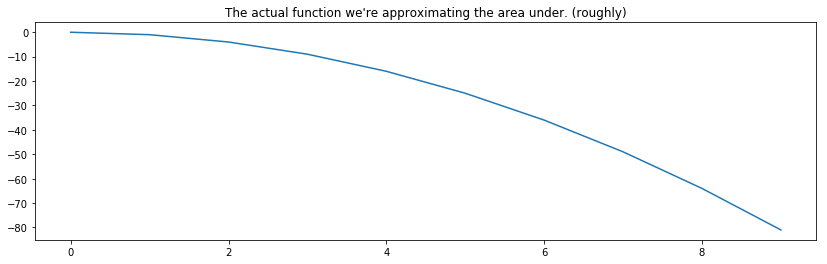

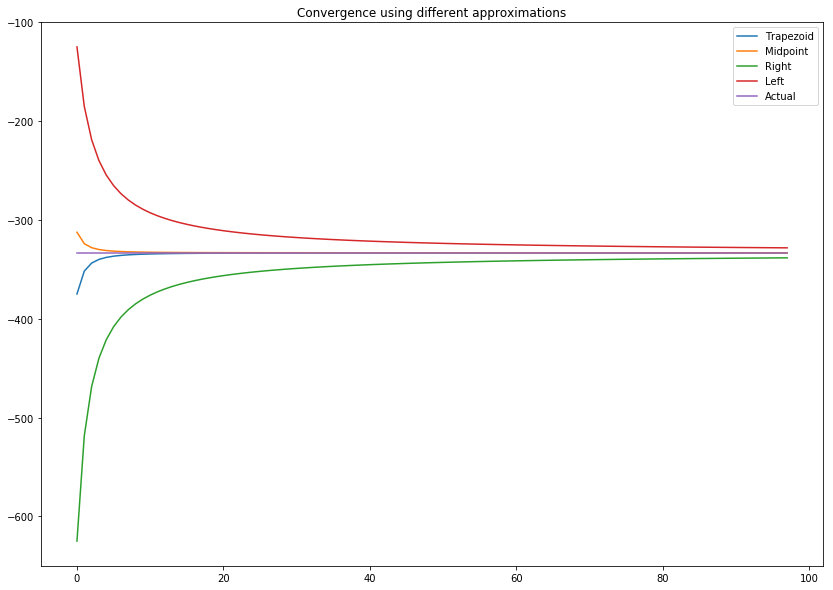

In [14]:
# f(x) = -(x^2)
def negative_x_squared(x):
    return -1 * (x ** 2)

calculate_and_plot(100, negative_x_squared, (-1000.0 / 3))

It looks basically the same, but flipped. Midpoint still converges the fastest, but now it's an overestimate.

Let's do one more. This one is both increasing, decreasing, concave up, concave down, positive, and negative in our interval of 0 to 10.

`f(x) = x^3 - 8x^2 + 4`

[View on WolframAlpha](https://www.wolframalpha.com/input/?i=x%5E3+-+8x%5E2+%2B+4)

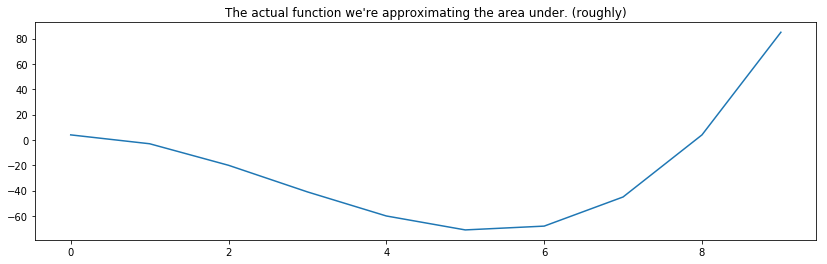

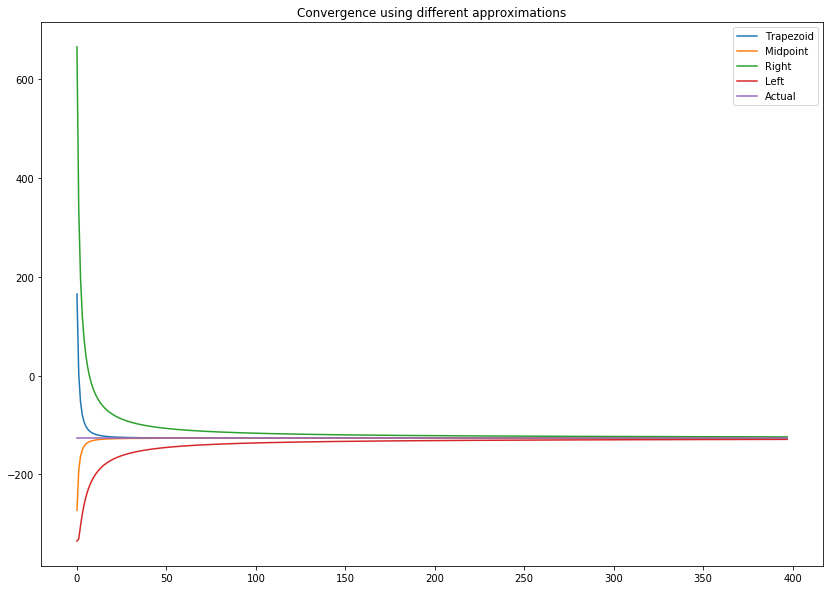

In [15]:
def crazy_fn(x):
    return x**3 - 8*(x**2) + 4

calculate_and_plot(400, crazy_fn, (-380.0 / 3))

Well, not that interesting. Midpoint is still the best.

In [16]:
def e_to_the_x(x):
    return np.e ** x

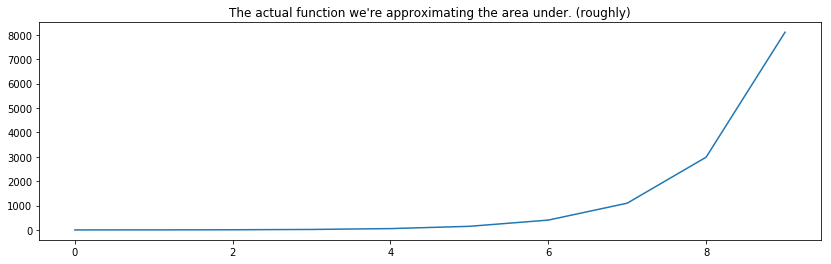

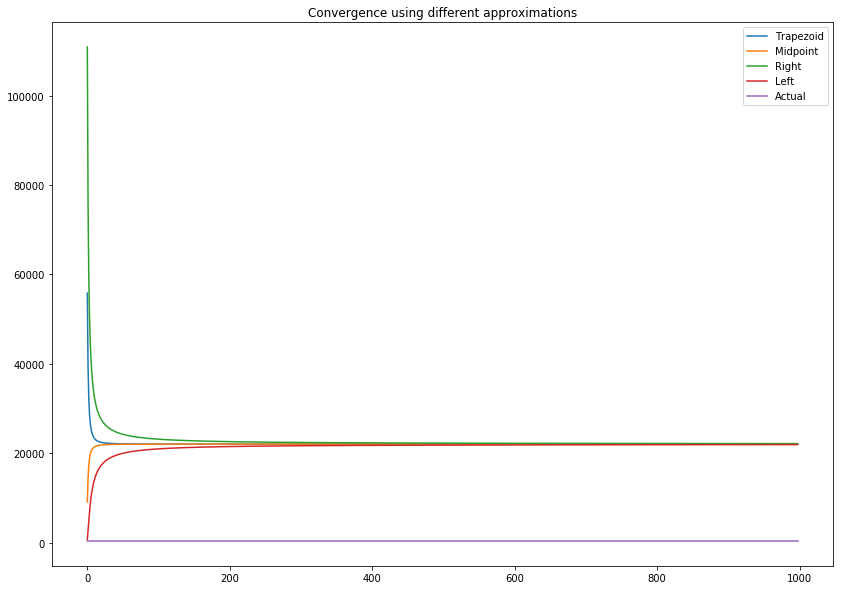

In [18]:
calculate_and_plot(1000, e_to_the_x, (1000.0/3))